# 1. Preprocessing (30 pts)

In [18]:
# conventional way to import pandas
import pandas as pd
import numpy as np

user_cols = ['Name','ScreenName', 'UserID', 'FollowersCount', 'FriendsCount', 'Location', 'Description', 'CreatedAt', 'StatusID', 'Language', 'Place', 'RetweetCount', 'FavoriteCount', 'Text']
df = pd.read_table('../data/clinton_trump_tweets.txt', header = None, names = user_cols, encoding = 'iso-8859-1')
pd.options.mode.chained_assignment = None

#Throw away all tweets that are retweets (text that starts with RT)
df.Text.str[0:1]
df = df[df.Text.str[0:2] != 'RT']
df.head()

Name     ScreenName      UserID  FollowersCount  FriendsCount  \
0           Cebel         Cebel6  1519696717             132           263   
2         nolaguy    nolaguy_phd  1450086582             797          1188   
6   David Walling  davidjwalling   106568768             975          2781   
7      robert2266     robert2266    17101060             845           938   
10         neddyo         neddyo    16818809            1400           379   

                     Location  \
0       Little Rock, Arkansas   
2                         NaN   
6                  Dallas, TX   
7                The Universe   
10  Long Island and beyond...   

                                                                                            Description  \
0                             Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.   
2                               An LSU Ph.D student living in New Orleans, trying to find a second act.   
6   Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. h...   
7                                                                                         The Dark Lord   
10  You should be digging it while it's happening - Zappa; I don't know how you do it, man. - Anasta...   

                        CreatedAt            StatusID Language Place  \
0   Sat Oct 29 08:10:06 EEST 2016  792232017094119425       en  null   
2   Sat Oct 29 21:53:29 EEST 2016  792439227090767872       en  null   
6   Sat Oct 29 00:16:48 EEST 2016  792112907488079872       en  null   
7   Fri Oct 28 14:41:06 EEST 2016  791968028191711237       en  null   
10   Mon Oct 31 08:06:52 EET 2016  792971077836124160       en  null   

    RetweetCount  FavoriteCount  \
0              0              1   
2              0              0   
6              0              0   
7              0              0   
10             0              1   

                                                                                                   Text  
0   @NWAJimmy I've read it now though brother. Was pretty spot on Lots of bright spots but a lot to ...  
2           @gaystoner821 I think New Orleans spoiled me with food. I need to try and branch out in BR.  
6   #infosec #Intel #ACM #IEEE  Impacts Haswell microarch. Paper proposes mitigations that could pre...  
7   Hacked e-mails show Clinton campaigns fears about Sanders | https://t.co/WMyCHuCDIc   The Philip...  
10                                                                                          Hulk smash!

In [12]:
def return_row_hashtags(row):
    ht_list = list()
    for eachWord in row:    
        if eachWord.startswith("#"):
            ht_list.append(eachWord)
    return ht_list

def return_row_handles(row):
    han_list = list()
    for eachWord in row:    
        if eachWord.startswith("@"):
            han_list.append(eachWord)
    return han_list

def return_row_hand_hash(row):
    hh_list = list()
    for eachWord in row:    
        if eachWord.startswith("@") | eachWord.startswith("#"):
            hh_list.append(eachWord)
    return hh_list

def get_unique_list(list1):
    return list(set(list1))

def return_row_count(hList):
    return len(set(hList))


### Strip #Hashtags and @Handles from Tweets

In [22]:
#And from the text keep only the hashtags (words that start with #)
#and the handles (words that start with @)
#Create a "basket" for each tweet that contains at least one hashtag or handle

#Grab hashtags and handles from Text column and store them in their own column
df["Hashtags_Handles"] = df.Text.map(lambda str: str.split()).apply(return_row_hand_hash)

df.head()

Name     ScreenName      UserID  FollowersCount  FriendsCount  \
0           Cebel         Cebel6  1519696717             132           263   
2         nolaguy    nolaguy_phd  1450086582             797          1188   
6   David Walling  davidjwalling   106568768             975          2781   
7      robert2266     robert2266    17101060             845           938   
10         neddyo         neddyo    16818809            1400           379   

                     Location  \
0       Little Rock, Arkansas   
2                         NaN   
6                  Dallas, TX   
7                The Universe   
10  Long Island and beyond...   

                                                                                            Description  \
0                             Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.   
2                               An LSU Ph.D student living in New Orleans, trying to find a second act.   
6   Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. h...   
7                                                                                         The Dark Lord   
10  You should be digging it while it's happening - Zappa; I don't know how you do it, man. - Anasta...   

                        CreatedAt            StatusID Language Place  \
0   Sat Oct 29 08:10:06 EEST 2016  792232017094119425       en  null   
2   Sat Oct 29 21:53:29 EEST 2016  792439227090767872       en  null   
6   Sat Oct 29 00:16:48 EEST 2016  792112907488079872       en  null   
7   Fri Oct 28 14:41:06 EEST 2016  791968028191711237       en  null   
10   Mon Oct 31 08:06:52 EET 2016  792971077836124160       en  null   

    RetweetCount  FavoriteCount  \
0              0              1   
2              0              0   
6              0              0   
7              0              0   
10             0              1   

                                                                                                   Text  \
0   @NWAJimmy I've read it now though brother. Was pretty spot on Lots of bright spots but a lot to ...   
2           @gaystoner821 I think New Orleans spoiled me with food. I need to try and branch out in BR.   
6   #infosec #Intel #ACM #IEEE  Impacts Haswell microarch. Paper proposes mitigations that could pre...   
7   Hacked e-mails show Clinton campaigns fears about Sanders | https://t.co/WMyCHuCDIc   The Philip...   
10                                                                                          Hulk smash!   

                   Hashtags_Handles  
0                       [@NWAJimmy]  
2                   [@gaystoner821]  
6   [#infosec, #Intel, #ACM, #IEEE]  
7                                []  
10                               []

### Group Hashtags and Handles by All UserIDs

In [23]:
# Set Col-width to 100 
pd.options.display.max_colwidth = 100

# Sorts by ScreenName and groups every handle and hashtag that a user has tweeted
# All Users including "Non-Active" Users
allUsersDF = df.groupby('UserID').agg({'Hashtags_Handles':'sum'})
allUsersDF["Hash_Hand_Count"] = allUsersDF.Hashtags_Handles.apply(return_row_count)
allUsersDF.reset_index()


UserID  \
0              150   
1             1437   
2             1501   
3             1512   
4             1644   
5             1668   
6             1737   
7             2294   
8             2311   
9             2391   
10            2424   
11            2426   
12            2480   
13           10420   
14           10549   
15           10637   
16           10715   
17           10933   
18           11014   
19           11569   
20           11862   
21           12404   
22           13512   
23           13558   
24           13683   
25           13737   
26           14763   
27           15543   
28           15833   
29           16373   
...            ...   
164767  2521842644   
164768  2521889909   
164769  2521921878   
164770  2521925561   
164771  2521929295   
164772  2521930375   
164773  2521930666   
164774  2521933298   
164775  2521935452   
164776  2521952112   
164777  2521964308   
164778  2521967087   
164779  2521976250   
164780  2521976948   
164781  2522077191   
164782  2522160205   
164783  2522174788   
164784  2522199981   
164785  2522209999   
164786  2522217890   
164787  2522238208   
164788  2522313516   
164789  2522333254   
164790  2522444346   
164791  2522473626   
164792  2522477492   
164793  2522544348   
164794  2522594107   
164795  2522622542   
164796  2522653212   

                                                                                           Hashtags_Handles  \
0       [@flangy, @nelson, @fjordinn, @shinypb, @fjordinn, @fjordinn, @iano, @thatstacy, @utilizer001, @...   
1         [#overheardinlondon, #whodeyintheUK, @JimOwczarski, #whodeyintheUK, @AirlineFlyer, @AirlineFlyer]   
2                                                                                                        []   
3                                                      [@mozilla, @david_bryant, @SenFeinstein, @marypcbuk]   
4       [@MaryLovesBooks, @BookNerdParadis, #5:, @matt_hearnden, #success, #perspective, #life, #Marketi...   
5                                                                                               [@garrytan]   
6       [@nehanarkhede, #ATO2016, @erinscafe, @MailChimp, #ATO2016., @rachaelmaddux, @_raven_io, @pwnela...   
7                                                                                                     [@qz]   
8                  [@wp, @ischafer, @TeslaMotors, @levie, @SlackHQ, #worldseries, @hitlist_app, #wandertab]   
9       [@NathanFGao, @bonaventuresoft, @presserb, @petshopboys, @eldescanso, @, @buzz, @andymatic, @pet...   
10                                   [@max_hodak, @ATT, @twxcorp, @ndustrialio, @OneLineage, @barryoreilly]   
11      [@MikeIsaac, @thelancearthur, @FFWglobal, @SenFeinstein,, #shootatweet, @SenFeinstein,, #shootat...   
12                                                                                                [@MrEchs]   
13                                                                                              [@scrowder]   
14      [@hallsy04, @BangsAndBlush, @night_moves, @ClintonsTavern, @Verdunite, @BangsAndBlush, #OilCount...   
15      [#gotribe, #RallyTogether, #MarinClevelandFans, @Browns, #Cleveland, #clevelandagainsttheworld, ...   
16      [@alextheaeon, @theabbeygirl, @Tenani, @jbseventyseven, @alextheaeon, #5, @alexmckay_, @theabbey...   
17                          [@ShashiSF, #AI:, #SDTechX?, #14, @emeyerson, @emeyerson, #CalBears, #CALvsUSC]   
18                                                                                                       []   
19      [#jets, #Jets, #Jets, #Jets, #Jets, @pyetti, @KirkCassels, @TheSheikh, @KirkCassels, #Jets, #Jet...   
20                                                                              [@scottsantens, #CRE, #CRE]   
21                                                                                         [#NYCcommute, @]   
22                                                                                            

In [24]:
uUserHashHandList = allUsersDF.Hashtags_Handles.apply(get_unique_list)
uUserHashHandList

UserID
150           [@raffi, @thatstacy, @utilizer001, @flangy, @shinypb, @Carricohimself, @doctorow, @nelson, @d6, ...
1437                                           [@AirlineFlyer, #whodeyintheUK, #overheardinlondon, @JimOwczarski]
1501                                                                                                           []
1512                                                         [@SenFeinstein, @marypcbuk, @david_bryant, @mozilla]
1644          [@RobWormley, #guestposting, #emailmarketing, #CRO, @raecarson, #Marketing:, @_awtozer, #5:, #pe...
1668                                                                                                  [@garrytan]
1737          [@ApacheSpot., @bakins, @jdickerson., @nehanarkhede, @erinscafe, @dcloues, @rachaelmaddux, @adic...
2294                                                                                                        [@qz]
2311                     [@levie, @hitlist_app, @wp, @ischafer, @SlackHQ, #wander

In [ ]:
# 
HashHandList = allUsersDF['Hashtags_Handles'].tolist()
allDuplHashHandList

In [123]:
def collect_HashHand_list(row):
    list
    for ht in row:
        allUniqueHashHandList.append(ht)

        
#Create empty Hashtag Handle list
allUniqueHashHandList = list()

#Create empty dataframe to show each hashtag or handle that a person tweeted
hhWith20DistinctDF = pd.DataFrame(columns = ['Hashtags/Handles', 'UserID', 'hashHandCount'])

#Repeats ScreenName and UserID based on the number of hashtags or handles the user mentions in their tweets
hhWith20DistinctDF['UserID'] = np.repeat(allUsersDF.index, allUsersDF['hashHandCount']) 

#Fills empty Hashtag Handle list with unique Hashtags and Handles
allUsersDF['uHashtags_uHandles'].apply(collect_HashHand_list)

#Create columns with counts of unique handles and hashtags
hhWith20DistinctDF['hashHandCount'] = uniqueUserSortedGroupedDF['hashHandCount']
hhWith20DistinctDF['Hashtags/Handles'] = allUniqueHashHandList

hhWith20DistinctDF

Hashtags/Handles      UserID  hashHandCount
0                       @utilizer001         150            NaN
1                    @Carricohimself         150            NaN
2                          @fjordinn         150            NaN
3                              @iano         150            NaN
4                           @shinypb         150            NaN
5                            @flangy         150            NaN
6                             @raffi         150            NaN
7                          @doctorow         150            NaN
8                            @gwestr         150            NaN
9                                @d6         150            NaN
10                           @nelson         150            NaN
11                        @thatstacy         150            NaN
12                        @Sonikku_a         150            NaN
13                    #whodeyintheUK        1437            NaN
14                     @JimOwczarski        1437            NaN
15                     @AirlineFlyer        1437            NaN
16                #overheardinlondon        1437            NaN
17                          @mozilla        1512            NaN
18                     @SenFeinstein        1512            NaN
19                     @david_bryant        1512            NaN
20                        @marypcbuk        1512            NaN
21                 #contentmarketing        1644            NaN
22                       @RobWormley        1644            NaN
23                         @_awtozer        1644            NaN
24                     @startrailsIV        1644            NaN
25                #ContentMarketing:        1644            NaN
26                             #blog        1644            NaN
27                        @rtmixmktg        1644            NaN
28                      #perspective        1644            NaN
29                    @FebruaryGrace        1644            NaN
30                       @fredrivett        1644            NaN
31                          #success        1644            NaN
32                      @WillBluntAU        1644            NaN
33                   @bloggingwizard        1644            NaN
34                         @adamjayc        1644            NaN
35                          @rahdieh        1644            NaN
36                   @LorilynRoberts        1644            NaN
37                   #emailmarketing        1644            NaN
38                    @LaurenLynneYA        1644            NaN
39                     @TolkienQuote        1644            NaN
40                           @LArtra        1644            NaN
41                      @TamieDearen        1644            NaN
42                       #Marketing:        1644            NaN
43                     @nick_eubanks        1644            NaN
44                        @raecarson        1644            NaN
45                               #5:        1644            NaN
46           #GuestBloggingStrategy:        1644            NaN
47                     #listbuilding        1644            NaN
48                    @KatyHuthJones        1644            NaN
49                              #CRO        1644            NaN
50                       @JRRTolkien        1644            NaN
51                   @MaryLovesBooks        1644            NaN
52                 #ContentMarketing        1644            NaN
53                    #promotionftw#        1644            NaN
54                       #motivation        1644            NaN
55                    @matt_hearnden        1644            NaN
56                        @EliseKova        1644            NaN
57                             #life        1644            NaN
58                  @BookNerdParadis        1644            NaN
59                      @CodyBLister        1644            NaN
60                     #guestposting        1644            NaN
61                         @garrytan        1668    

In [120]:
uniqueUserSortedGroupedDF

Hashtag  \
UserID                                                                                                            
150                                                                                                          []   
1437                                                       [#overheardinlondon, #whodeyintheUK, #whodeyintheUK]   
1501                                                                                                         []   
1512                                                                                                         []   
1644        [#5:, #success, #perspective, #life, #Marketing:, #contentmarketing, #promotionftw#, #contentmar...   
1668                                                                                                         []   
1737                                                       [#ATO2016, #ATO2016., #ATO2016, #ATO2016., #ATO2016]   
2294                                                                                                         []   
2311                                                                                 [#worldseries, #wandertab]   
2391                                                                                                         []   
2424                                                                                                         []   
2426        [#shootatweet, #shootatweet, #shootatweet, #shootatweet, #shootatweet, #shootatweet, #shootatwee...   
2480                                                                                                         []   
10420                                                                                                        []   
10549                                   [#OilCountry, #HockeyFightsCancer, #DoSomething, #GetUpNoOneTouchedYou]   
10637       [#gotribe, #RallyTogether, #MarinClevelandFans, #Cleveland, #clevelandagainsttheworld, #clevelan...   
10715                                                                                                      [#5]   
10933                                                              [#AI:, #SDTechX?, #14, #CalBears, #CALvsUSC]   
11014                                                                                                        []   
11569       [#jets, #Jets, #Jets, #Jets, #Jets, #Jets, #Jets, #PissedPatrick, #jets, #Jets, #Jets, #J_E_T_S_...   
11862                                                                                              [#CRE, #CRE]   
12404                                                                                             [#NYCcommute]   
13512                                                                                                [#ArsenaI]   
13558       [#undeniable, #nature, #free, #protection, #SimpleAsThat, #virtual., #culture, #transcendence, #...   
13683                                                                                                        []   
13737                                                                                                        []   
14763       [#fall, #nofilter, #portland, #beauty, #goruck, #fitness, #spartan, #training, #EducateYourself,...   
15543                                                                                                        []   
15833                                                                                                        []   
16373                                                                                             [#fontdesign]   
16663                                                                                                        []   
16743                                                                                                        []   
23983                                                                                                        []   
24113                                                                          

In [114]:
#Get rid of non-active users that use less than 20 Hashtags or Handles
activeUsers = allDuplHashHandList[hhWith20DistinctDF.hashHandCount > 20]
activeUsers

#Create new dataframe to display Hashtags and Handles and how many times they were used by active users
df1 = pd.DataFrame(columns = ['Hashtags/Handles', 'Count'])
df1['Hashtags/Handles'] = activeUsers['Hashtags/Handles'].value_counts().keys().tolist()
df1['Count'] = activeUsers['Hashtags/Handles'].value_counts().tolist()

#Create new dataframe to display Hashtags and Handles and how many times they were used by active users
    #That have also been used by at least 20 users
df2 = df1[df1.Count > 19]
df2

ValueError: cannot reindex from a duplicate axis

In [99]:
#Gets list of unique handles and hashtags
uniqueUserSortedGroupedDF['uHashtags/uHandles'] = uniqueUserSortedGroupedDF['Hashtags/Handles'].apply(get_unique_list)

#Creates columns with counts of unique handles and hashtags
uniqueUserSortedGroupedDF['hashtagCount'] = uniqueUserSortedGroupedDF.Hashtag.apply(return_row_count)
uniqueUserSortedGroupedDF['handleCount'] = uniqueUserSortedGroupedDF.Handle.apply(return_row_count)
uniqueUserSortedGroupedDF['hashHandCount'] = uniqueUserSortedGroupedDF['hashtagCount'] + uniqueUserSortedGroupedDF['handleCount']

uniqueUserSortedGroupedDF

Hashtag  \
UserID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
150                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          []   
1437                                                                                                                                                                                                                                                                                                                                                                                                                                                                       [#overheardinlondon, #whodeyintheUK, #whodeyintheUK]   
1501                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         []   
1512                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         []   
1644                                                                                                                                                                                                                                                                 [#5:, #success, #perspective, #life, #Marketing:, #contentmarketing, #promotionftw#, #contentmarketing, #ContentMarketing, #GuestBloggingStrategy:, #ContentMarketing:, #blog, #listbuilding, #guestposting, #motivation, #success, #emailmarketing, #CRO]   
1668                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         []   
1737                                                                                                                                                                                                                                                                                                                                                                                            

In [101]:
def return_join_string(row):
    return ' '.join(row)

uniqueUserSortedGroupedDF['uHashtags/Handles String'] = uniqueUserSortedGroupedDF['uHashtags/uHandles'].apply(return_join_string)

uniqueUserSortedGroupedDF 

Hashtag  \
UserID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
150                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          []   
1437                                                                                                                                                                                                                                                                                                                                                                                                                                                                       [#overheardinlondon, #whodeyintheUK, #whodeyintheUK]   
1501                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         []   
1512                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         []   
1644                                                                                                                                                                                                                                                                 [#5:, #success, #perspective, #life, #Marketing:, #contentmarketing, #promotionftw#, #contentmarketing, #ContentMarketing, #GuestBloggingStrategy:, #ContentMarketing:, #blog, #listbuilding, #guestposting, #motivation, #success, #emailmarketing, #CRO]   
1668                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         []   
1737                                                                                                                                                                                                                                                                                                                                                                                            

In [103]:


hhUserIDDF = pd.DataFrame(columns = ['uHashtags/Handles String', 'hashHandCount'])
#hhUserIDDF = uniqueUserSortedGroupedDF['uHashtags/Handles String']
hhUserIDDF['uHashtags/Handles String'] = uniqueUserSortedGroupedDF['uHashtags/Handles String']
hhUserIDDF['hashHandCount'] = uniqueUserSortedGroupedDF['hashHandCount']
hhUserIDDF = hhUserIDDF[hhUserIDDF['hashHandCount'] > 19] 
hhUserIDDF 


uHashtags/Handles String  \
UserID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
1644        #contentmarketing @RobWormley @_awtozer @startrailsIV #ContentMarketing: #blog @rtmixmktg #perspective @FebruaryGrace @fredrivett #success @WillBluntAU @bloggingwizard @adamjayc @rahdieh @LorilynRoberts #emailmarketing @LaurenLynneYA @TolkienQuote @LArtra @TamieDearen #Marketing: @nick_eubanks @raecarson #5: #GuestBloggingStrategy: #listbuilding @KatyHuthJones #CRO @JRRTolkien @MaryLovesBooks #ContentMarketing #promotionftw# #motivation @matt_hearnden @EliseKova #life @BookNerdParadis @CodyB...   
1737                                                                                                                                                                                                     @MailChimp @SwiftOnSecurity @ComfortablySmug @adickerson @jessfraz @MailChimp. @erinscafe #ATO2016 @samnesmith @Michael_Tsunam1 @pwnela @rachaelmaddux @ApacheSpot. @skamille @KyFaSt @salrelish @nehanarkhede @_raven_io @jdickerson. @bakins @Vuforia. @PTC's @solrac901 @GregU. #ATO2016. @JessicaMauerhan @dcloues   
2391                                                          @lmc @dansays @Annaleen @fmanjoo @nczeitgeist @j3sse_pub @twitter @tonx @willsh @presserb @timbuckwalter @robynkanner @bjheinley @yodamay @kathrynyu @TimGunn @mknepprath @bonaventuresoft @MikeIsaac @migurski @rtraister @TheCut @buzz @eldescanso @twitter's @steveportigal @thelastwalt @mnik @atrubens @dansinker @summersumz @MaxTemkin @petshopboys @hhavrilesky @BenKennerly @ @scarequotes @billder @kowitz @NathanFGao @michael @clearwriter @andymatic   
2426        @halvorson @GOP @FFWglobal @abookapart: @ChappellTracker @sonia__harris @zeldman @blocktogether @matt_timmons @beaucolburn @astronautpnguin @sjarvis @thelancearthur @facebook @MikeHosier #choad @JoeGermuska @facebook. @MikeIsaac @Real_TJ_Thomas @SherylCababa #MxF2016 @gruber @SenatorBoxer, @facebook! @NancyPelosi, @ToddRoss @natts @dansinker @madebyfew @parisvega @designhawg @espiekermann @austinkleon #shootatweet @de5igner #gunsonfacebookrightnow. @SenFeinstein, @romanmars @knightlab @unite...   
14763                                                                                                                                                                           @hihellosm @mwhuss @kristina_basham @wjgilmore @zapatoche #EducateYourself @treehouse #fitness #productivity #effectiveness #nofilter #portland @nikiforovalex18 #spartan @garrettdimon @codejake #fall @KatieMSmith @danielmall #goruck @bencareynyt #beauty @zuhrisaifudin45 @davatron5000 #training #timemanagement @GORUCK. @AaronGustafson   
1026541     @stacey_robbins @dallascowboys #destiny #HowBoutThemCowboys #Cubs #Ripplespotlight @EmirMemic2004 @Cubs #Ripple2016 #believe @zharper6 #upnow #Hornswin @TheWalkingDead #firstwinsince45 @krisstinawise #rick #fight #truth #FlyTheW #makeadifference #CowboysNation @ChristineMHaas #backtowrigley @supportdevelop @ownerinsite #playlikechampions @AMC_TV #Backtocleveland #Rippleactionoftheday #soccer #itaintoveryet @CelticFutbol #proudcoach #reputation @TruesdellClass #Rippling @zesty_cubs #Rippletho...   
1134681     @WhiteHouse #NeverHillary @c4chaos #MAGA @Gavin_McInnes @RobSilver @therealroseanne @Neil_Irwin @Socialismkills @carlbildt @RickAnderson @DavidAFrench #PodestaEmails @Cernovich @ripmymunchies #NeverHillary, @wikileaks @Warden_AoS #NeverTrump @NextOnTCM @okapiden @asymmetricinfo @SANDRAYYCNW @adamjohnsonNYC @ILoveHillaryC @JVLast @SamHarrisOrg @oliverdar

In [25]:
def collect_HashHand_list(row):
    for ht in row:
        allUniqueHashHandList.append(ht)

        
#Create empty Hashtag Handle list
allUniqueHashHandList = list()


#Create empty dataframe to show each hashtag or handle that a person tweeted
hhWith20DistinctDF = pd.DataFrame(columns = ['Hashtags/Handles', 'UserID', 'hashHandCount'])

#Repeats ScreenName and UserID based on the number of hashtags or handles the user mentions in their tweets
hhWith20DistinctDF['UserID'] = np.repeat(uniqueUserSortedGroupedDF['UserID'], uniqueUserSortedGroupedDF['hashHandCount']) 

#Fills empty Hashtag Handle list with unique Hashtags and Handles
uniqueUserSortedGroupedDF['uHashtags/uHandles'].apply(collect_HashHand_list)



#Create columns with counts of unique handles and hashtags
hhWith20DistinctDF['hashHandCount'] = uniqueUserSortedGroupedDF['hashHandCount']
hhWith20DistinctDF['Hashtags/Handles'] = allUniqueHashHandList

hhWith20DistinctDF


NameError: name 'uniqueUserSortedGroupedDF' is not defined

In [129]:
#activeUsers[activeUsers['Hashtags/Handles'].isin(hhWith20DistinctDF)]
hhWith20DistinctDF

Empty DataFrame
Columns: [Hashtags/Handles, UserID, hashHandCount]
Index: []

In [23]:
#Get rid of non-active users that use less than 20 Hashtags or Handles
activeUsers = hhWith20DistinctDF[hhWith20DistinctDF.hashHandCount > 20]
activeUsers

#Create new dataframe to display Hashtags and Handles and how many times they were used by active users
df1 = pd.DataFrame(columns = ['Hashtags/Handles', 'Count'])
df1['Hashtags/Handles'] = activeUsers['Hashtags/Handles'].value_counts().keys().tolist()
df1['Count'] = activeUsers['Hashtags/Handles'].value_counts().tolist()

#Create new dataframe to display Hashtags and Handles and how many times they were used by active users
    #That have also been used by at least 20 users
df2 = df1[df1.Count > 19]
df2

Hashtags/Handles  Count
0                         @realDonaldTrump   4473
1                          @HillaryClinton   4116
2                                 @YouTube   2493
3                                     @CNN   2070
4                              @megynkelly   2040
5                                        @   2022
6                                 @FoxNews   2011
7                            @newtgingrich   1464
8                             @seanhannity   1341
9                                     @FBI   1301
10                         @KellyannePolls   1291
11                         @washingtonpost   1263
12                                @nytimes   1248
13                                  @POTUS   1240
14                            #WorldSeries   1174
15                              @wikileaks   1157
16                                   #MAGA   1085
17                                  #Trump   1081
18                                    @ABC   1051
19                                  @MSNBC   1024
20                        @jasoninthehouse   1013
21                              #ImWithHer    964
22                             @mike_pence    869
23                             @JoyAnnReid    837
24                            @CNNPolitics    768
25                          @BreitbartNews    766
26                            @mitchellvii    761
27                                    @WSJ    754
28                             @jaketapper    751
29                                       #    747
30                               @politico    727
31                               @WDFx2EU7    687
32                                @NBCNews    681
33                              #Halloween    659
34                         @kurteichenwald    654
35                          @thedailybeast    652
36                                @MMFlint    615
37                           @PrisonPlanet    608
38                                      #1    602
39                            @SpeakerRyan    598
40                                @thehill    592
41                          @IngrahamAngle    591
42                                   @Cubs    589
43                            @HuffPostPol    581
44                                #Hillary    573
45                                @CBSNews    564
46                         #HillaryClinton    558
47                           @WalshFreedom    556
48                         @DonaldJTrumpJr    551
49                              #halloween    543
50                                    #FBI    541
51                                 #NoDAPL    538
52                                 @FLOTUS    526
53                                   @vine    518
54                             @DanScavino    507
55                           #Election2016    504
56                           @JudgeJeanine    497
57                          @Evan_McMullin    495
58                         @RealJamesWoods    494
59                            @chrislhayes    492
60                                    @GOP    492
61                                 @nypost    491
62                           #TrumpPence16    466
63                              @Cernovich    460
64                             @JaredWyand    455
65                           #NeverHillary    450
66                           @donnabrazile    448
67                               @LouDobbs    447
68                             #NeverTrump    446
69                         #CrookedHillary    445
70                                   #Cubs    445
71                          #draintheswamp    441
72                               @SopanDeb    439
73                          #DrainTheSwamp    437
74                            @BarackObama    436
75                               @USATODAY    431
76                         @JamesOKeefeIII    414
77                                 @maddow    405
78                                @Indians    401
79                        

In [50]:
def collect_DuplHashHand_list(row):
    for ht in row:
        allDuplHashHandList.append(ht)        

allDuplHashHandList = list()
uniqueUserSortedGroupedDF['Hashtags/Handles'].apply(collect_DuplHashHand_list)
allDuplHashHandList

['@annaafletcher',
 '@RannvijaySingha',
 '#Mahasidi',
 '#Amicos',
 '#UhurutoCorruptionTrain',
 '#Mahasidi',
 '#DeportBobCollymore',
 '#Mahasidi',
 '#GainWithXtianDela',
 '#Mahasidi',
 '#GainWithVerifiedCofek',
 '#GainWithVerifiedCofek',
 '#UhurutoCorruptionTrain',
 '#IWantAPhoneThatCan',
 '#UhurutoCorruptionTrain',
 '#GainWithVerifiedCofek',
 '#GainWithYahBoiSelfie',
 '#IWantAPhoneThatCan',
 '#Mahasidi',
 '#Fisi',
 '#JailAwaitsYou',
 '#GainWithVerifiedCofek',
 '#SonkoTheDrunk',
 '#DeportBobCollymore',
 '#IWantAPhoneThatCan',
 '@tim_oballa',
 '@HassanAliJoho',
 '@AIRTEL_KE',
 '@HassanAliJoho',
 '@viviankenya',
 '@shipetamathias',
 '@MaskiniMilionea',
 '@AJENews',
 '@njooro',
 '@paulkiarie001',
 '@ngathokaranja',
 '@AJEnglish',
 '@ngathokaranja',
 '@AJEnglish',
 '@SafaricomLtd',
 '#XFactor',
 '#lifegoals',
 '@taeccool',
 '#photo',
 '#photo',
 '#photo',
 '#photo',
 '#photo',
 '#trickorbrew',
 '@clownshoesbeer',
 '@shipyardbrewing',
 '@NoLabelBrewCo',
 '@TallgrassBeer',
 '@rogueales',
 '@s

In [104]:
import sklearn.cluster as sk_cluster
import sklearn.feature_extraction.text as sk_text
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)

vectorizer = sk_text.CountVectorizer(min_df = 1)

handHashMatrix = vectorizer.fit_transform(hhUserIDDF['uHashtags/Handles String']) 

print(handHashMatrix)
print(type(handHashMatrix))
#print(handHashMatrix.toarray())
print(vectorizer.get_feature_names())

  (0, 135305)	1
  (0, 70799)	1
  (0, 45635)	1
  (0, 197557)	1
  (0, 104353)	1
  (0, 213632)	1
  (0, 228741)	1
  (0, 268308)	1
  (0, 212841)	1
  (0, 175126)	1
  (0, 77090)	1
  (0, 180866)	1
  (0, 199671)	1
  (0, 135299)	1
  (0, 272525)	1
  (0, 240439)	1
  (0, 211264)	1
  (0, 323665)	1
  (0, 192325)	1
  (0, 340643)	1
  (0, 193227)	1
  (0, 105317)	1
  (0, 202577)	1
  (0, 272734)	1
  (0, 9750)	1
  :	:
  (17693, 131439)	1
  (17693, 228741)	1
  (17694, 136247)	1
  (17694, 206623)	1
  (17694, 7731)	1
  (17694, 206964)	1
  (17694, 271561)	1
  (17694, 60624)	1
  (17694, 298252)	1
  (17694, 223042)	1
  (17694, 311770)	1
  (17694, 12751)	1
  (17694, 215347)	1
  (17694, 25446)	1
  (17694, 303890)	1
  (17694, 98733)	1
  (17694, 11491)	1
  (17694, 271560)	1
  (17694, 373944)	1
  (17694, 209449)	1
  (17694, 27841)	1
  (17694, 8183)	1
  (17694, 271246)	1
  (17694, 184599)	1
  (17694, 302535)	1
<class 'scipy.sparse.csr.csr_matrix'>


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [110]:
kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=20, n_init=10, max_iter=300)  

# n_init: Number of time the k-means algorithm will be run 
# max_iter : int, default: 300

kmeans.fit_predict(handHashMatrix)

print ('\n Cluster Centroids')
centroids = kmeans.cluster_centers_
print (centroids)

print ('\nCluster labels')
kmeans_labels = kmeans.labels_
print(kmeans_labels)

print('\n')
error = kmeans.inertia_       #SSE; Sum of squared distances of samples to their closest cluster center.
print ("The total error of the clustering is: ", error)



 Cluster Centroids
[[ 0.00026441  0.00026441  0.00026441 ...,  0.00026441  0.00026441
   0.00026441]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]

Cluster labels
[ 0 19  0 ...,  0  0  0]


The total error of the clustering is:  3767.554468535278


In [48]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

Text(0,0.5,'SSE')

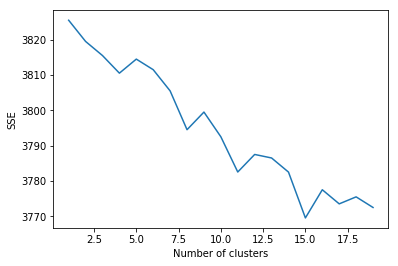

In [111]:
error = np.zeros(20)
for k in range(1,20):
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(handHashMatrix)
    error[k] = kmeans.inertia_

plt.plot(range(1, 20), error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [53]:
df2[df2['Hashtags/Handles'] == '@realDonaldTrump']

Hashtags/Handles  Count
0  @realDonaldTrump   4473

In [109]:
import sklearn.cluster as sk_cluster
import sklearn.feature_extraction.text as sk_text


vectorizer = sk_text.CountVectorizer(min_df = 1)

handHashMatrix = vectorizer.fit_transform(df2['Hashtags/Handles']) 
'''
print(handHashMatrix)
print(handHashMatrix.toarray())
print()
len(vectorizer.get_feature_names())
print(vectorizer.fit_transform(df2['Count']))
'''
cluster_map = pd.DataFrame()
cluster_map['Cluster'] = kmeans.labels_
cluster_map['Cluster' == 0]


KeyError: False

In [24]:
import sklearn.cluster as sk_cluster
import matplotlib.pyplot as plt
%matplotlib inline




X = [[0, 0], [0, 0.3], [0.4, 0.5], [0.6, 0.5], [0.8, 0.8], [1, 1]]

kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=300)  

# n_init: Number of time the k-means algorithm will be run 
# max_iter : int, default: 300

kmeans.fit_predict(df2)

print ('\n Cluster Centroids')
centroids = kmeans.cluster_centers_
print (centroids)

print ('\nCluster labels')
kmeans_labels = kmeans.labels_
print(kmeans_labels)

print('\n')
error = kmeans.inertia_       #SSE; Sum of squared distances of samples to their closest cluster center.
print ("The total error of the clustering is: ", error)


ValueError: could not convert string to float: '@FrankConniff'